## Covid-19 Analysis

__Image Source:__ https://cordis.europa.eu/article/id/435709-investigating-europe-s-life-saving-lockdown-policies
![image info](images/lockdown.jpg)

__Image Source:__ https://www.sciencedirect.com/science/article/pii/S0959652621019235
![image info](images/covidimpact.jpg)

Due to the spike of Covid19 Cases, there are several sectors was impacted such as human lifestyle, economy, environment, energy sector.

__Covid-19 Dataset Source:__ https://ourworldindata.org/covid-cases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

covid = pd.read_csv('data/owid-covid-data.csv')

In [2]:
#Removing unnecessary columns 
covid.drop(['total_cases','new_cases_smoothed','total_deaths','new_deaths_smoothed','total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','icu_patients_per_million','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_tests','new_tests','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','tests_per_case','tests_units','total_vaccinations','new_vaccinations','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred','new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred','stringency_index','median_age','aged_65_older','aged_70_older','gdp_per_capita','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index','excess_mortality_cumulative_absolute','excess_mortality_cumulative','excess_mortality','excess_mortality_cumulative_per_million','iso_code','continent','positive_rate','reproduction_rate','people_vaccinated','total_boosters','population','population_density'], axis = 1, inplace = True)

#Defining unnecessary rows
removedRows = ["Africa","Albania","Algeria","Andorra","Angola","Anguilla","Antigua and Barbuda","Aruba","Asia","Azerbaijan","Bahamas","Bahrain","Barbados","Belize","Benin","Bermuda","Bolivia","Bonaire Sint Eustatius and Saba","Bosnia and Herzegovina","Botswana","British Virgin Islands","Bulgaria","Burkina Faso","Burundi","Cameroon","Cape Verde","Cayman Islands","Central African Republic","Chad","Comoros","Congo","Costa Rica","Cote d'Ivoire","Croatia","Cuba","Curacao","Cyprus","Democratic Republic of Congo","Djibouti","Dominica","Dominican Republic","Ecuador","Egypt","El Salvador","Equatorial Guinea","Eritrea","Estonia","Eswatini","Ethiopia","Europe","European Union","Faeroe Islands","Falkland Islands","French Polynesia","Gabon","Gambia","Georgia","Ghana","Gibraltar","Greenland","Grenada","Guatemala","Guernsey","Guinea","Guinea-Bissau","Guyana","Haiti","High income","Honduras","Iceland","International","Iran","Iraq","Isle of Man","Israel","Jamaica","Jersey","Jordan","Kenya","Kosovo","Kuwait","Latvia","Lebanon","Lesotho","Liberia","Libya","Liechtenstein","Lithuania","Low income","Lower middle income","Macao","Madagascar","Malawi","Mali","Malta","Marshall Islands","Mauritania","Mauritius","Micronesia (country)","Monaco","Montenegro","Montserrat","Morocco","Mozambique","Namibia","New Caledonia","Nicaragua","Niger","Nigeria","Niue","North America","North Macedonia","Northern Cyprus","Oceania","Oman","Palestine","Panama","Paraguay","Pitcairn","Qatar","Romania","Rwanda","Saint Helena","Saint Kitts and Nevis","Saint Lucia","Saint Pierre and Miquelon","Saint Vincent and the Grenadines","San Marino","Sao Tome and Principe","Saudi Arabia","Senegal","Serbia","Seychelles","Sierra Leone","Sint Maarten (Dutch part)","Slovenia","Somalia","South America","South Sudan","Sudan","Suriname","Syria","Tanzania","Togo","Tokelau","Trinidad and Tobago","Tunisia","Turkmenistan","Turks and Caicos Islands","Uganda","Ukraine","United Arab Emirates","Upper middle income","Uruguay","Uzbekistan","Vatican","Wallis and Futuna","World","Yemen","Zambia","Zimbabwe"]

In [3]:
# Removing unnecessary rows
covid = covid[covid.location.isin(removedRows) == False]

# Replacing null value to zero
covid = covid.replace(np.nan, 0)

#Removing 0 value rows
covid = covid.loc[(covid == 0).any(axis=1)]

In [4]:
# Converting Date column into Datetime format
from datetime import datetime
covid['date'] = pd.to_datetime(covid['date'])

# Renaming column name
covid.rename(columns = {'location':'Country','date':'Date'}, inplace = True)

In [5]:
dt = [
    (covid['Date'] < '2020-05-02'),
    (covid['Date'] >= '2020-05-02') & (covid['Date'] < '2020-08-01'),
    (covid['Date'] >= '2020-08-01') & (covid['Date'] < '2020-10-31'),
    (covid['Date'] >= '2020-10-31') & (covid['Date'] < '2021-01-30'),
    (covid['Date'] >= '2021-01-30') & (covid['Date'] < '2021-05-01'),
    (covid['Date'] >= '2021-05-01') & (covid['Date'] < '2021-07-31'),
    (covid['Date'] >= '2021-07-31') & (covid['Date'] < '2021-10-30'),
    (covid['Date'] >= '2021-10-30') & (covid['Date'] < '2022-01-29'),
    (covid['Date'] >= '2022-01-29') & (covid['Date'] < '2022-04-30'),
    (covid['Date'] >= '2022-04-30') & (covid['Date'] < '2022-07-30'),
    (covid['Date'] >= '2022-07-30') & (covid['Date'] < '2022-10-29'),
    (covid['Date'] >= '2022-10-29')
]

qtr = ['FY21Q1', 'FY21Q2', 'FY21Q3', 'FY21Q4','FY22Q1', 'FY22Q2', 'FY22Q3', 'FY22Q4','FY23Q1', 'FY23Q2', 'FY23Q3', 'FY23Q4']

covid['Quarter'] = np.select(dt, qtr)

qtr_clm = covid.pop('Quarter')
covid.insert(2, 'Quarter', qtr_clm)
covid.head(500)

,Country,Date,Quarter,new_cases,new_deaths,icu_patients,hosp_patients,people_fully_vaccinated,extreme_poverty
0,Afghanistan,2020-02-24,FY21Q1,5.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,2020-02-25,FY21Q1,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2020-02-26,FY21Q1,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2020-02-27,FY21Q1,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2020-02-28,FY21Q1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
495,Afghanistan,2021-07-03,FY22Q2,1329.0,59.0,0.0,0.0,0.0,0.0
496,Afghanistan,2021-07-04,FY22Q2,1263.0,92.0,0.0,0.0,0.0,0.0
497,Afghanistan,2021-07-05,FY22Q2,1189.0,84.0,0.0,0.0,189322.0,0.0
498,Afghanistan,2021-07-06,FY22Q2,1527.0,77.0,0.0,0.0,0.0,0.0


In [6]:
region = []

for row in covid['Country']:
    if row == 'Afghanistan':region.append('APJ') #APJ 1
    elif row == 'Australia':region.append('APJ') # APJ 2
    elif row == 'Bangladesh':region.append('APJ') # APJ 3
    elif row == 'Bhutan':region.append('APJ') #APJ 4
    elif row == 'Brunei':region.append('APJ') #APJ 5
    elif row == 'Cambodia':region.append('APJ') #APJ 6
    elif row == 'China':region.append('APJ') #APJ 7
    elif row == 'Cook Islands':region.append('APJ') #APJ 8
    elif row == 'Fiji':region.append('APJ') #APJ 9
    elif row == 'Hong Kong':region.append('APJ') #APJ 10
    elif row == 'India':region.append('APJ') #APJ 11
    elif row == 'Indonesia':region.append('APJ') #APJ 12
    elif row == 'Japan':region.append('APJ') #APJ 13
    elif row == 'Kiribati':region.append('APJ') #APJ 14
    elif row == 'Laos':region.append('APJ') #APJ 15
    elif row == 'Malaysia':region.append('APJ') #APJ 16
    elif row == 'Maldives':region.append('APJ') #APJ 17
    elif row == 'Mongolia':region.append('APJ') #APJ 18
    elif row == 'Myanmar':region.append('APJ') #APJ 19
    elif row == 'Nauru':region.append('APJ') #APJ 20
    elif row == 'Nepal':region.append('APJ') #APJ 21
    elif row == 'New Zealand':region.append('APJ') #APJ 22
    elif row == 'Pakistan':region.append('APJ') #APJ 23
    elif row == 'Palau':region.append('APJ') #APJ 24
    elif row == 'Papua New Guinea':region.append('APJ') #APJ 25
    elif row == 'Philippines':region.append('APJ') #APJ 26
    elif row == 'Samoa':region.append('APJ') #APJ 27
    elif row == 'Singapore':region.append('APJ') #APJ 28
    elif row == 'Solomon Islands':region.append('APJ') #APJ 29
    elif row == 'South Korea':region.append('APJ') #APJ 30
    elif row == 'Sri Lanka':region.append('APJ') #APJ 31
    elif row == 'Taiwan':region.append('APJ') #APJ 32
    elif row == 'Thailand':region.append('APJ') #APJ 33
    elif row == 'Timor':region.append('APJ') #APJ 34
    elif row == 'Tonga':region.append('APJ') #APJ 35
    elif row == 'Tuvalu':region.append('APJ') #APJ 36
    elif row == 'Vanuatu':region.append('APJ') #APJ 37
    elif row == 'Vietnam':region.append('APJ') #APJ 38
    elif row == 'Argentina':region.append('AMER') #AMER 1
    elif row == 'Brazil':region.append('AMER') #AMER 2
    elif row == 'Canada':region.append('AMER') #AMER 3
    elif row == 'Chile':region.append('AMER') #AMER 4
    elif row == 'Colombia':region.append('AMER') #AMER 5
    elif row == 'Mexico':region.append('AMER') #AMER 6
    elif row == 'Peru':region.append('AMER') #AMER 7
    elif row == 'United States':region.append('AMER') #AMER 8
    elif row == 'Venezuela':region.append('AMER') #AMER 9
    else: region.append('EMEA')
    

covid['Region'] = region
first_column = covid.pop('Region')
covid.insert(0, 'Region', first_column)
covid

,Region,Country,Date,Quarter,new_cases,new_deaths,icu_patients,hosp_patients,people_fully_vaccinated,extreme_poverty
0,APJ,Afghanistan,2020-02-24,FY21Q1,5.0,0.0,0.0,0.0,0.0,0.0
1,APJ,Afghanistan,2020-02-25,FY21Q1,0.0,0.0,0.0,0.0,0.0,0.0
2,APJ,Afghanistan,2020-02-26,FY21Q1,0.0,0.0,0.0,0.0,0.0,0.0
3,APJ,Afghanistan,2020-02-27,FY21Q1,0.0,0.0,0.0,0.0,0.0,0.0
4,APJ,Afghanistan,2020-02-28,FY21Q1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
167606,APJ,Vietnam,2022-03-21,FY23Q1,131713.0,69.0,0.0,0.0,77696920.0,2.0
167607,APJ,Vietnam,2022-03-22,FY23Q1,249153.0,65.0,0.0,0.0,77754108.0,2.0
167608,APJ,Vietnam,2022-03-23,FY23Q1,140837.0,61.0,0.0,0.0,0.0,2.0
167609,APJ,Vietnam,2022-03-24,FY23Q1,120000.0,70.0,0.0,0.0,0.0,2.0


In [7]:
# Grouping columns by Region, Location & Year
groupbyYear = covid.groupby([(covid.Date.dt.year)]).agg(
    New_Cases = ('new_cases','sum'),
    New_Deaths = ('new_deaths','sum'),
    ICU_Patients = ('icu_patients','sum'),
    Hosp_Patients = ('hosp_patients','sum'),
    People_Fully_Vaccinated = ('people_fully_vaccinated','sum'),
    Extreme_Poverty = ('extreme_poverty','sum'),).reset_index()

# CSV file
groupbyYear = pd.DataFrame(groupbyYear)
groupbyYear.to_csv('data/groupbyYear.csv',index=False)

In [8]:
# Grouping columns by Location, Year
groupbyQtr = covid.groupby([(covid.Region),(covid.Quarter),(covid.Country)]).agg(
    New_Cases = ('new_cases','sum'),
    New_Deaths = ('new_deaths','sum'),
    ICU_Patients = ('icu_patients','sum'),
    Hosp_Patients = ('hosp_patients','sum'),
    People_Fully_Vaccinated = ('people_fully_vaccinated','sum'),
    Extreme_Poverty = ('extreme_poverty','sum'),).reset_index()

# CSV file
groupbyQtr = pd.DataFrame(groupbyQtr)
groupbyQtr.to_csv('data/groupbyQtr.csv',index=False)

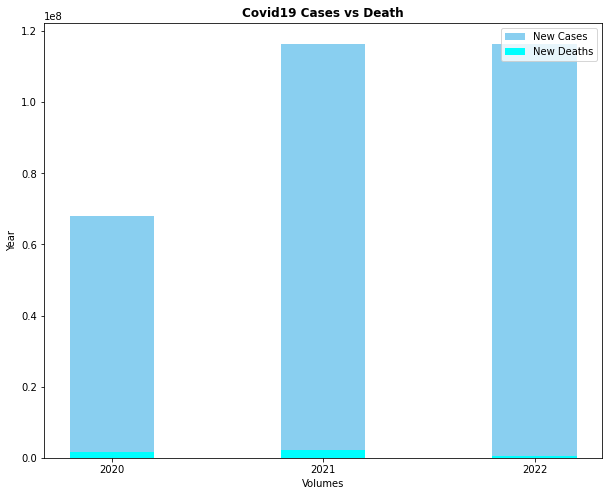

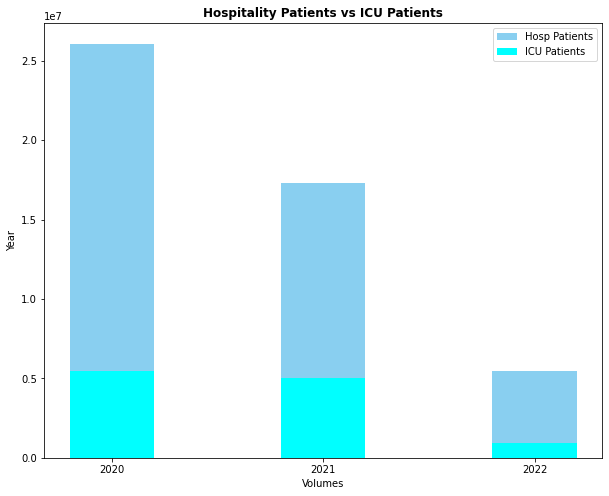

In [9]:
# set width of bars
w = 0.5

# Figure Size
fig = plt.figure(figsize =(10, 8))

# Define x-axis
year = groupbyYear['Date']

minimum = min(year)
maximum = max(year)
newnum = range(math.floor(min(year)), math.ceil(max(year))+1)

# Define y-axis
cases = groupbyYear['New_Cases']
deaths = groupbyYear['New_Deaths']
icu = groupbyYear['ICU_Patients']
hosp = groupbyYear['Hosp_Patients']
vaccine = groupbyYear['People_Fully_Vaccinated']
povetry = groupbyYear['Extreme_Poverty']

# Make the plot cases vs death
plt.bar(year, cases, 0.4, color='#89CFF0', label='New Cases')
plt.bar(year, deaths, 0.4, color='#00FFFF', label='New Deaths')

# Add the labels
plt.xlabel('Volumes')
plt.ylabel('Year')
plt.title("Covid19 Cases vs Death", fontweight='bold')
plt.xticks(newnum)
 
# Create legend & Show graphic
plt.legend(loc='upper right')
plt.show()

# Figure Size
fig = plt.figure(figsize =(10, 8))

# Make the plot hospitality vs ICU
plt.bar(year, hosp, 0.4, color='#89CFF0', label='Hosp Patients')
plt.bar(year, icu, 0.4, color='#00FFFF', label='ICU Patients')
 
# Add xticks on the middle of the group bars
plt.xlabel('Volumes')
plt.ylabel('Year')
plt.title("Hospitality Patients vs ICU Patients", fontweight='bold')
plt.xticks(newnum)
 
# Create legend & Show graphic
plt.legend(loc='upper right')
plt.show()